### Usefull imports

In [1]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

### GAN package

In [2]:
from GAN.dataset import TabularDataset
from GAN.network.networks import GAN, train_gan

### Importing dataset

In [3]:
df = pd.read_csv("./body_performance/preprocessed_body_performance.csv")
X = df.iloc[:, :11] 
X.head()

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm
0,27,0,172.3,75.24,21.3,80,130,54.9,18.4,60,217
1,25,0,165.0,55.80,15.7,77,126,36.4,16.3,53,229
2,31,0,179.6,78.00,20.1,92,152,44.8,12.0,49,181
3,32,0,174.5,71.10,18.4,76,147,41.4,15.2,53,219
4,28,0,173.8,67.70,17.1,70,127,43.5,27.1,45,217


### Setting GAN hyperparameters

In [8]:
data_shape = X.shape[1]                 # 11
noise_shape = 16
hidden_size = 16
epochs = 100
batch_size = 16
learning_rate = 0.001

### Preparing dataset and dataloader (pytorch)

In [9]:
dataset = TabularDataset(data=X.values)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

### Creating the GAN model

In [10]:
gan = GAN(
    real_data_size=data_shape,
    noise_size=noise_shape,
    hidden_size=hidden_size
)

GENERATOR
noise: 16 = output: 11 = hidden: 16
DISCRIMINATOR
input: 11 = hidden: 16


### Training the GAN

In [11]:
discriminator_loss, generator_loss = train_gan(
    gan=gan,
    dataloader=dataloader,
    noise_size=noise_shape,
    epochs=epochs,
    learning_rate=learning_rate
)

Epoch 0
Epoch [1/100] Batch [0/730] Discriminator Loss: 8.6725 Generator Loss: 0.6452
Epoch [1/100] Batch [100/730] Discriminator Loss: 0.9043 Generator Loss: 0.5269
Epoch [1/100] Batch [200/730] Discriminator Loss: 0.6490 Generator Loss: 0.7418
Epoch [1/100] Batch [300/730] Discriminator Loss: 0.5745 Generator Loss: 0.8828
Epoch [1/100] Batch [400/730] Discriminator Loss: 0.5577 Generator Loss: 0.9107
Epoch [1/100] Batch [500/730] Discriminator Loss: 0.1265 Generator Loss: 2.2489
Epoch [1/100] Batch [600/730] Discriminator Loss: 0.2674 Generator Loss: 1.4558
Epoch [1/100] Batch [700/730] Discriminator Loss: 0.1648 Generator Loss: 1.8800
Epoch 1
Epoch [2/100] Batch [0/730] Discriminator Loss: 0.1277 Generator Loss: 2.1497
Epoch [2/100] Batch [100/730] Discriminator Loss: 0.0627 Generator Loss: 2.7116
Epoch [2/100] Batch [200/730] Discriminator Loss: 0.0705 Generator Loss: 2.6747
Epoch [2/100] Batch [300/730] Discriminator Loss: 0.0522 Generator Loss: 2.9373
Epoch [2/100] Batch [400/730

### Generating syntethic data from random distribution

In [13]:
z = torch.randn(X.shape[0], noise_shape)
fake_samples = gan.generator(z)
fake = pd.DataFrame(data=fake_samples.detach().numpy(), columns=X.columns)
fake.to_csv("syntethic_body_performance.csv", index=False)
fake.head()

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm
0,50.095249,-4.291431,257.113647,95.584442,27.928909,137.627380,199.815247,42.630894,14.692581,73.200531,286.298645
1,49.586155,-1.021846,105.346916,40.984802,18.433632,48.196522,90.026840,24.057970,18.743423,18.911339,103.322868
2,61.750786,-4.143138,212.260208,79.057976,15.342410,83.000565,160.924637,59.250904,26.598061,65.135162,309.762390
3,37.816429,-0.227080,144.584137,44.349155,20.183048,74.655708,118.143959,20.888203,22.803024,43.333454,148.482086
4,36.597324,-1.924411,222.864120,72.399994,25.657452,117.812569,171.894547,31.770962,18.545496,70.300903,246.259308


### Training losses

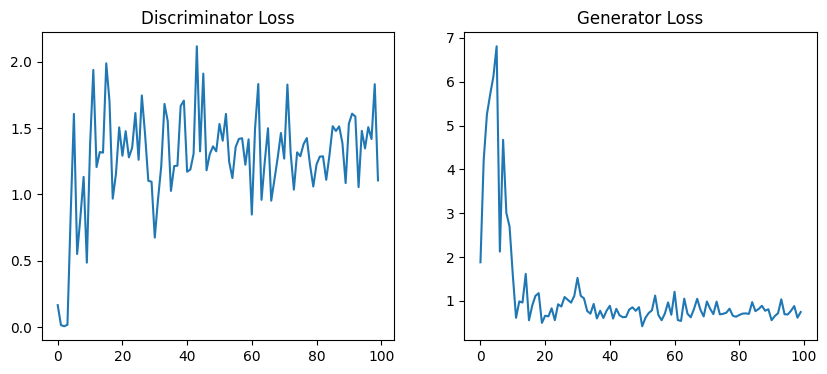

In [46]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title("Discriminator Loss")
plt.plot(discriminator_loss)

plt.subplot(1, 2, 2)
plt.title("Generator Loss")
plt.plot(generator_loss)

plt.savefig("losses.jpg")

### Comparing original and synthetic dataset

In [31]:
import math

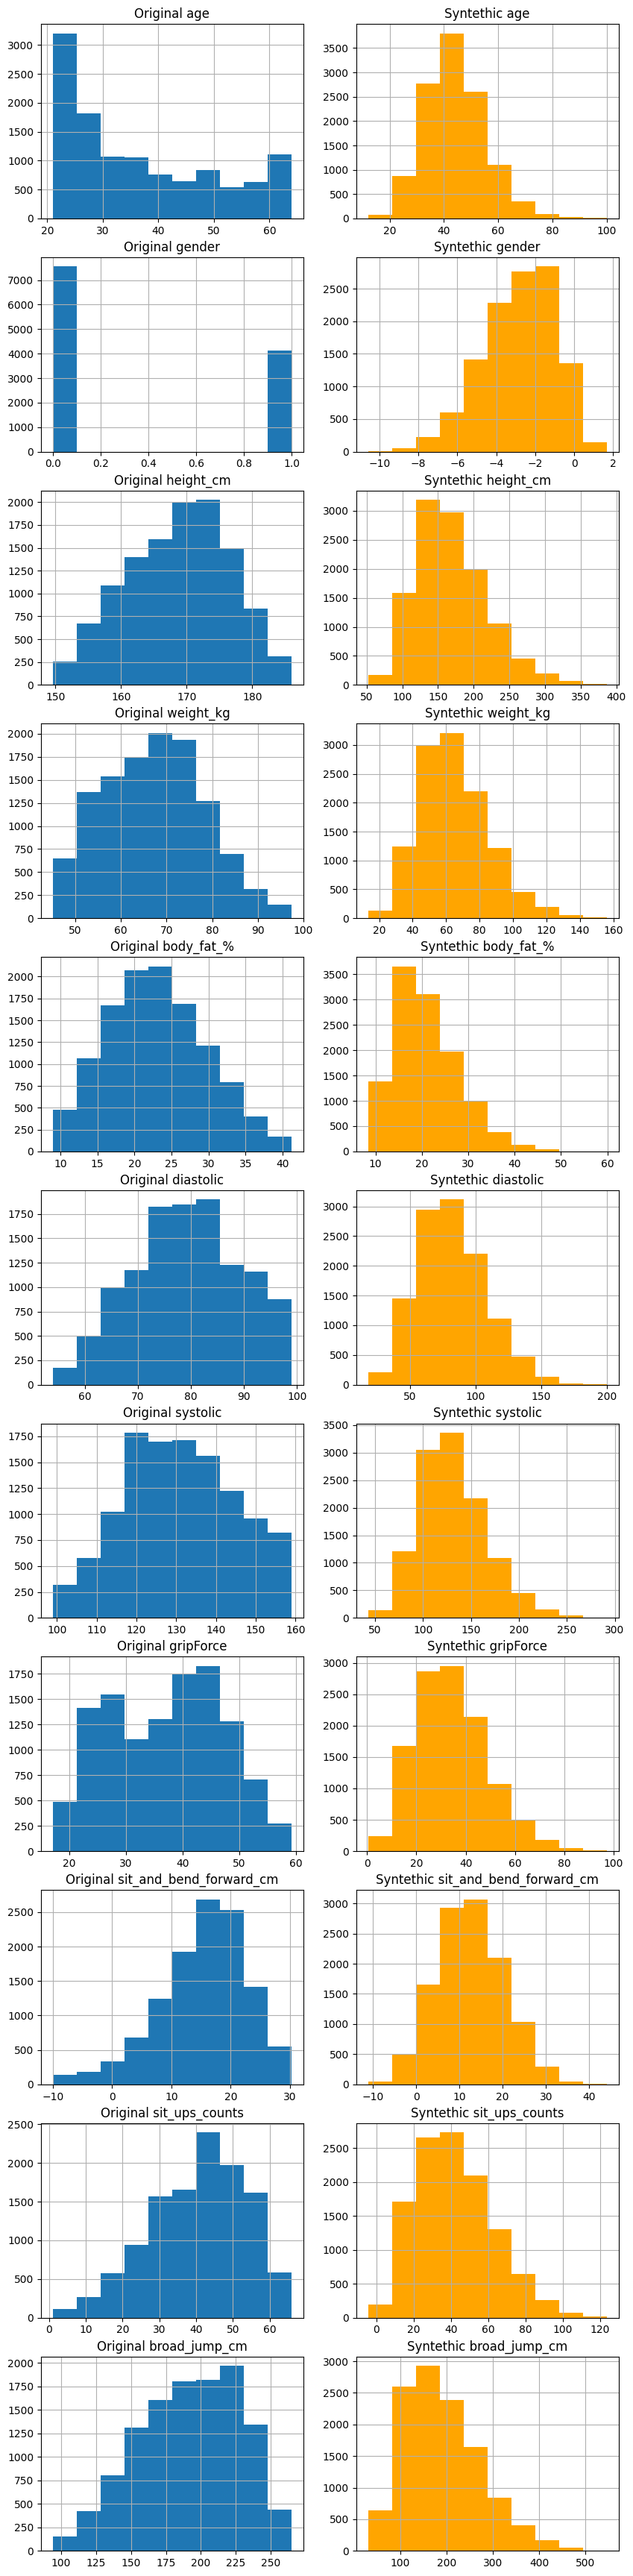

In [38]:
nfeat = X.shape[1]

ncols = 2
nrows = nfeat

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5,nrows*4))

for i, feat in enumerate(X.columns):
    n_ax = ax[i, 0]
    X[feat].hist(ax=n_ax)
    n_ax.set_title(f"Original {feat}")
    
    n_ax = ax[i, 1]
    fake[feat].hist(ax=n_ax, color="orange")
    n_ax.set_title(f"Syntethic {feat}")

plt.savefig("histogram_comparison.jpg")
plt.show()

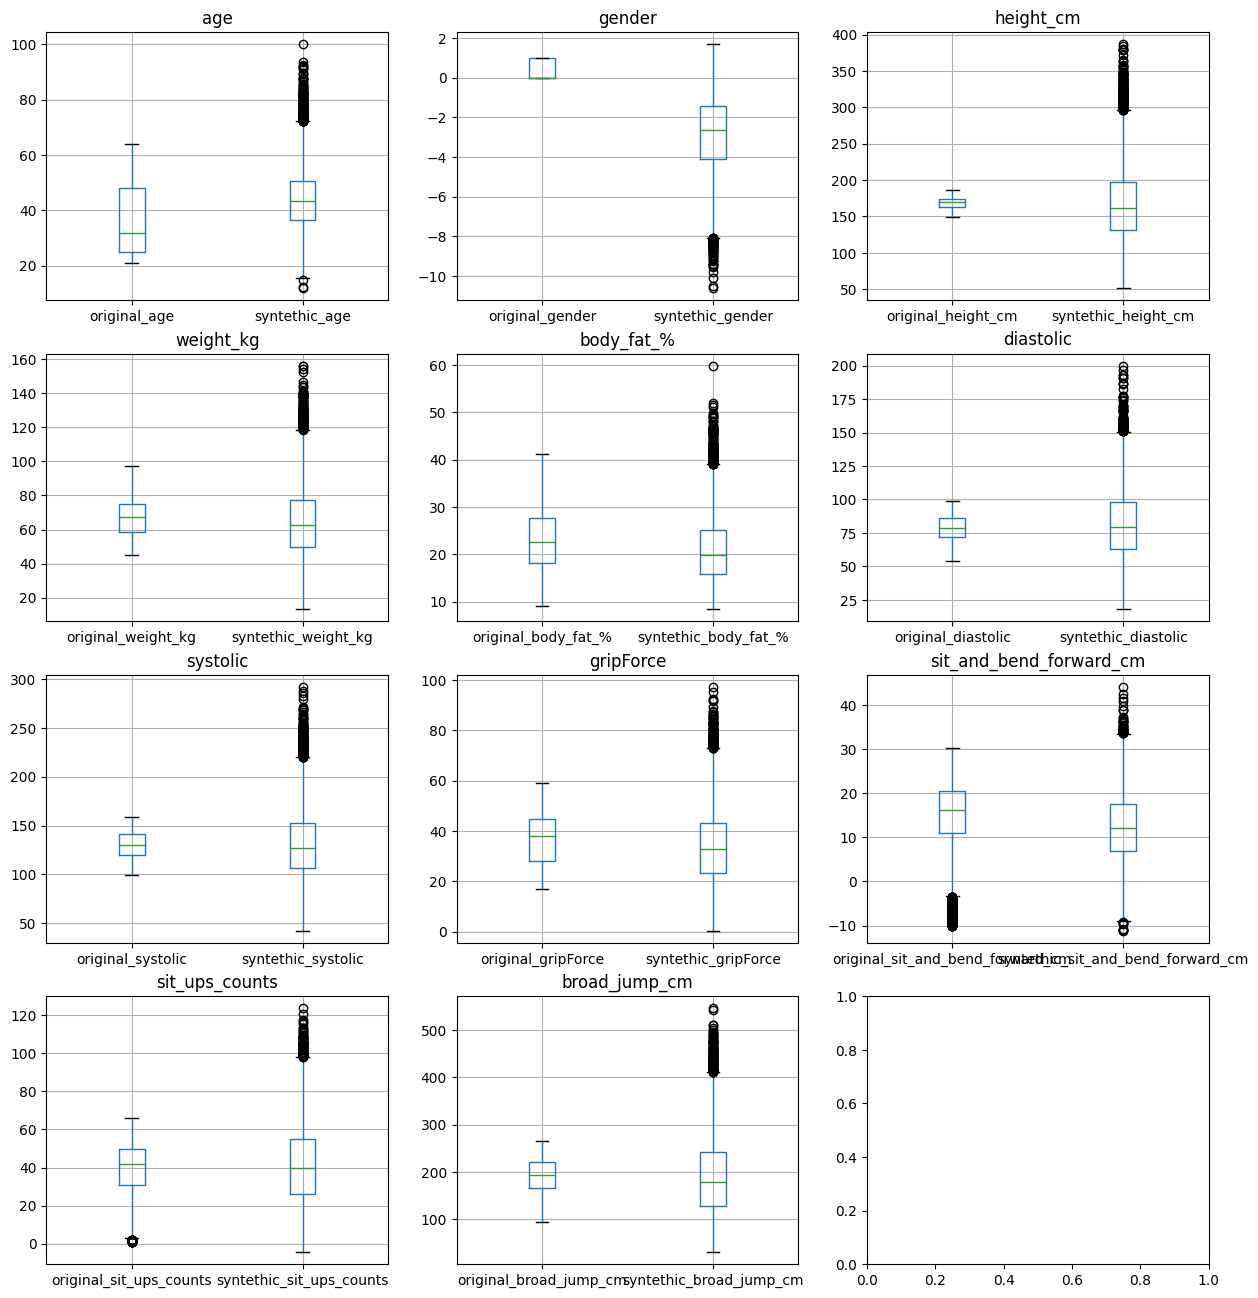

In [37]:
nfeat = X.shape[1]

ncols = 3
nrows = int(math.ceil(nfeat/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5,nrows*4))

i, j = 0, 0
for feat in X.columns:

    aux_df = pd.DataFrame()
    aux_df[f"original_{feat}"] = X[feat]
    aux_df[f"syntethic_{feat}"] = fake[feat]

    n_ax = ax[i, j]

    aux_df.boxplot(column=[f"original_{feat}", f"syntethic_{feat}"], ax=n_ax)
    n_ax.set_title(f"{feat}")
    
    j += 1
    if j == ncols:
        j = 0
        i += 1

plt.savefig("boxplot_comparison.jpg")
plt.show()

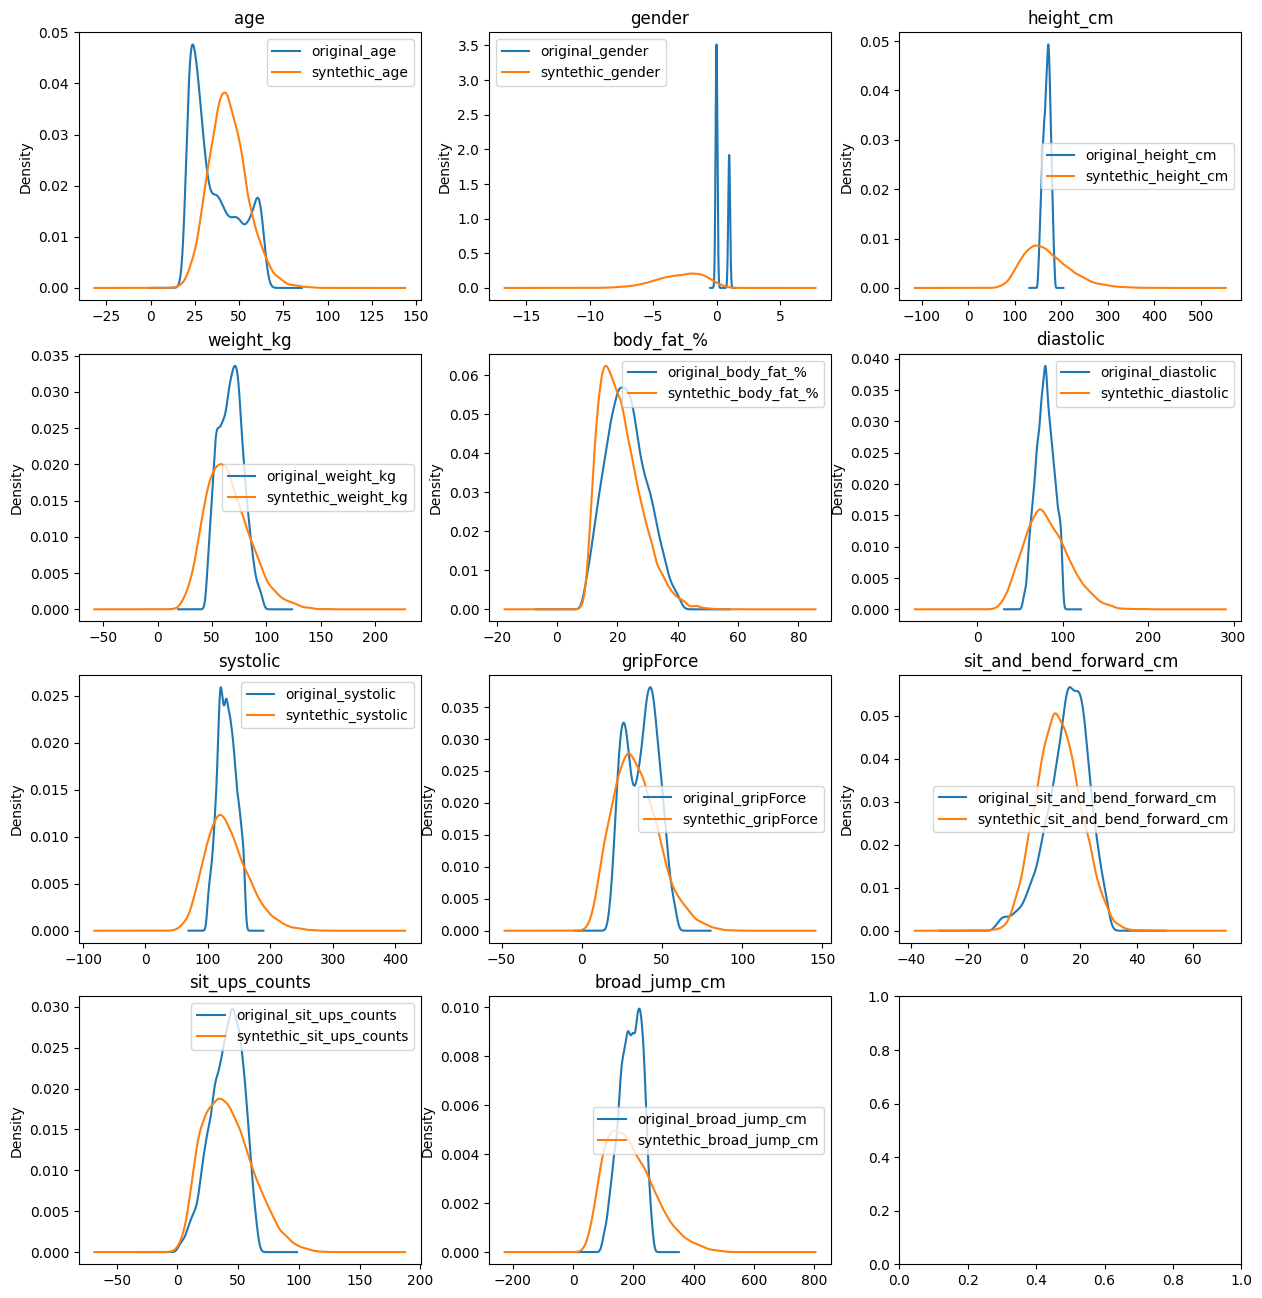

In [41]:
nfeat = X.shape[1]

ncols = 3
nrows = int(math.ceil(nfeat/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5,nrows*4))

i, j = 0, 0
for feat in X.columns:

    aux_df = pd.DataFrame()
    aux_df[f"original_{feat}"] = X[feat]
    aux_df[f"syntethic_{feat}"] = fake[feat]

    n_ax = ax[i, j]

    aux_df.plot.kde(ax=n_ax)
    n_ax.set_title(f"{feat}")
    
    j += 1
    if j == ncols:
        j = 0
        i += 1

plt.savefig("kde_comparison.jpg")
plt.show()

### Como prosseguir?

- Qual estratégia adotar para variáveis booleanas?
- Os dados sintéticos obedecem (ou quase) uma normal, se os dados forem normalizados antes e decodificados no fim, pode aproximar o resultado?
- Os dados gerados tem muitos outliers
- Os dados não são rotulados, qual a melhor forma de rotular?
    - Gerar dados de cada classe separadamente?
    - Classificar os dados gerados
    - (estudar melhor cGAN)